# The Numpy Random Package

This notebook will discuss and dempnstrate the Numpy Random package.  This is submission for the Programming for Data Analysis module in GMIT.  

The Numpy documentation can be found [here](https://numpy.org/doc/stable/reference/random/index.html)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

<br>

### Setting plot parameters

In [2]:
# See styles : https://matplotlib.org/stable/tutorials/introductory/customizing.html#composing-styles 
plt.rcParams['figure.figsize'] = [6, 6]

## NumPy
Numerical Python or "Numpy" is a package in Python that is used for data manipulation on numerical data. Numpy preforms fast operations on arrays. (MAYBE PUT SOME EXAMPLES IN HERE OF WHAT IT DOES EG SORTING). Numpy is much more effecient at preforming numerical data manipulation on its arrays than python is on lists. As Numpy is deisgned specifically for numerical data manipulation, it uses pre-compiled code rather than longer/ less efficient general phython code i.e. looping, indexing, etc..  (MAYBE DO A DEMO on efficiency?)  [1]

## NumPy Random
Numpy Random is a subpackage of numpy.  The main purpose of the random package is for creating simulation data that generated randomly depending on the function that is chosen.  3 categories of functions: simple random data, permutations, and distributions.  

Discuss pseudorandom number generator (PRNG) - how random is random, not truely random. Seeds to be discussed later.

<br>

# Simple Random Data
## Random Integers
The integers function provides a random number(s) between the parameters the user provides.  The parameters  include low, high (exclusive) and size of the sample of random numbers (optional but default size is 1).  First we'll generate one random number to simulate a dice roll.

In [3]:
rng = np.random.default_rng()
rng.integers(1, 7)

1

<br>

### Array of Random Integers
We can also generate an array of randoms. Below we will generate lotto quick pick numbers. 

In [4]:
rng = np.random.default_rng()
rng.integers(1, 48, size= 6)  # high is exclusive so numbers are generated between 1 - 47. 

array([27,  9,  7, 28, 38, 13], dtype=int64)

<br>

If we wish generate our quickpick numbers for lotto,  lotto plus 1 and lotto plus 2, we can create 3 arrays each containing 6 numbers. 

In [5]:
rng.integers(1, 48, size= (3,6))

array([[ 1, 10, 36, 21, 12, 33],
       [38, 33, 15, 25, 23, 15],
       [ 5, 25, 38, 32, 30, 11]], dtype=int64)

<br>

### Progressive/ Regressive Random Arrays
We can set lower or higher limits for numbers in the array as the random generation proceeds. As the range between the low and high narrows, we get a gradual increase or decrease in the frequency of the random number. To do so we set the lower or higher limit bounds by an array as the parameter.[2] 

Below is an example of setting the lower bounds for an array of 10,000 numbers. This is done by iterating through the size of the random array. The low parameter will increase slightly after each random number is generated, narrowing the random number choice available. This ultimately leads to the array being top heavy.  We can see this illustrated on the below histogram.

In [6]:
low = []
high = 10001 # High is exclusive for array and range. 10,000 is the true size. 


for i in range(1, high):
    lower_limit = i * 0.99
    low.append(lower_limit)

progressive_10k = rng.integers([low], high, size=high-1) #size is high-1 because high is exclusive.

(array([  55.,  162.,  290.,  442.,  624.,  794., 1092., 1444., 1901.,
        3196.]),
 array([   60.,  1054.,  2048.,  3042.,  4036.,  5030.,  6024.,  7018.,
         8012.,  9006., 10000.]),
 <BarContainer object of 10 artists>)

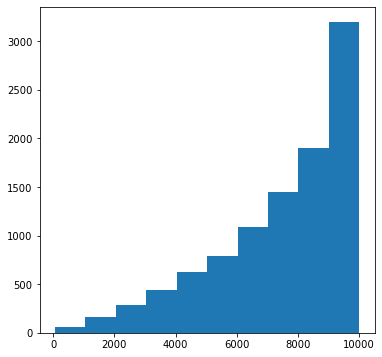

In [7]:
plt.hist(progressive_10k)

<br>

## Random Floats

The Random function in Numpy will provide floating point random numbers between 0 and 1(exclusive). As with random integers, random numbers are generated with a uniform distribion across the range.  Although parameters within the random function are limited. 

In [8]:
rand_flt = rng.random(10000)

(array([ 981.,  990.,  993., 1028., 1015., 1013.,  971., 1006., 1023.,
         980.]),
 array([4.88296582e-05, 1.00039090e-01, 2.00029351e-01, 3.00019612e-01,
        4.00009873e-01, 5.00000133e-01, 5.99990394e-01, 6.99980655e-01,
        7.99970915e-01, 8.99961176e-01, 9.99951437e-01]),
 <BarContainer object of 10 artists>)

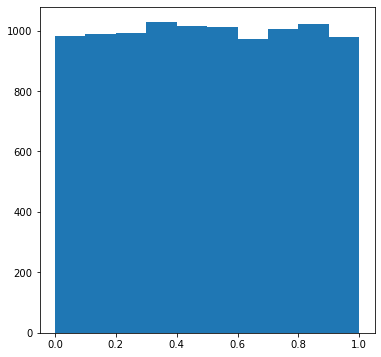

In [9]:
plt.hist(rand_flt)

<br>

## Choice

Random choice allows us to pick a random item(s) from an array or number(s) from a range.  We have the option to have that item returned to the pool to be potientally reselected for subsequent choices or not. Additionality we can set the probability of an item being selected. It's also worth noting that an array can contain a variety of data types, i.e ints, floats, strings, booleans, lists, etc.. [5][6]

Below I will demostrate a raffle where one contestant wins.  Although lets say we favour 11 and 32 over each other contestant.  Lets set their probilitity of winning higher than the rest and run the raffle 100 times.  I will then plot the frequency of each winner. 

In [10]:
player_profile = {} # [4] creating a dict to assign probabilities to specific contestants. 
players_no = []
probability =np.array([]) #[7]
winners = []
count = 0

while count < 100:  # running the function/ raffle 100 times. 
    for i in np.arange(100): # looping through players, setting probability.
        if i == 11:
            player_profile[i] = 0.25  # contestant 11 has 25% probability of being selected. 

        elif i == 32:
            player_profile[i] = 0.25   # contestant 32 has 25% probability of being selected.

        else: 
            player_profile[i] = 0.00757 # all other contestant each have 0.757% of being selected. 


    for keys in player_profile.keys(): # [8] iterating through the dict for players
        players_no.append(keys)  # appending the players to an array to be added to choice function. 


    for values in player_profile.values():  # need to create a numpy array before appending 
        probability = np.append(probability, values)  # as we'll need to sum these below. 


    probability /= probability.sum() #[3] - Need to sum and divide by itself as probability would not add to 1. 


    winner = rng.choice(players_no, p = probability) # choice between players with probabilities set. 
    winners.append(winner)
    count +=1


(array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  4., 22.,  1.,  0.,  0.,
         0.,  1.,  4.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,
         1.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  2.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,
         1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,  1.]),
 array([ 2.  ,  2.97,  3.94,  4.91,  5.88,  6.85,  7.82,  8.79,  9.76,
        10.73, 11.7 , 12.67, 13.64, 14.61, 15.58, 16.55, 17.52, 18.49,
        19.46, 20.43, 21.4 , 22.37, 23.34, 24.31, 25.28, 26.25, 27.22,
        28.19, 29.16, 30.13, 31.1 , 32.07, 33.04, 34.01, 34.98, 35.95,
        36.92, 37.89, 38.86, 39.83, 40.8 , 41.77, 42.74, 43.71, 44.68,
        45.65, 46.62, 47.59, 48.56, 49.53, 50.5 , 51.47, 52.44, 53.41,
        

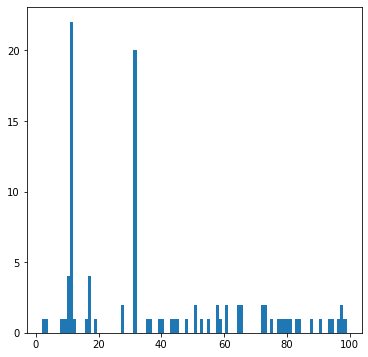

In [11]:
plt.hist(winners, bins=100) # Plotting the results of the 100 raffles.  # Need to do a better plot. 

<br>

# Permutations
## Shuffle & Permute

Shuffling mixes the contents of a range, array or another mutable sequence.  We can shuffle a list and output the results in an array or in multi dimensional arrays.  This will shuffle the contents of the original data. 

Permute is similar however the original data is not suffled. Rather a copy of the original data is made which is shuffled. [9]

Below we will create two 5-aside soccer teams.  Individuals are picked at random from a selection of 10 and placed into 2 seperate teams.

In [12]:
players = np.arange(10) # Creating a numpy array with numbers ranging from 0 to 9. 
rng.shuffle(players) # Shuffling the players up. 

teams = players.reshape((2, 5)) # Placing the random numbers into 2 arrays each containing 5 numbers.
rng.shuffle(teams) # Shuffling the order of the arrays.  Team A will kick off.  

Team_A = teams[0]
Team_B = teams[1]

print("Team A contains players: {}. You will kick off.".format(Team_A))
print("Team B contains players: {}".format(Team_B))



Team A contains players: [7 5 1 8 9]. You will kick off.
Team B contains players: [0 2 3 6 4]


<br>

# Distributions
Need to introduce the purpose of use of distributions

## Normal

Need to describe the Normal function. [13]

I obtained a dataset of 252 males height that was originally published in a journal in 1985. "Generalized Body Composition Prediction Equation for Men Using Simple Measurement Techniques" by K. Penrose, A. Nelson, A.G. Fisher in Medicine and Science in Sports and Exercise 17(2) (1985) 189.   

The dataset is available: http://www.statistics4u.com/fundstat_eng/data_bodyfat.html

Below I intend to plot the height of each sample and compare this sample agaist a random sample of normally distributed numbers. Important to note that 1 outlier was removed from the dataset which was 29.50 inches.  The mean for the remaining 251 height measurements was 70.3 inches. 

The average adult male height in the USA is 69.1 inches.[11] This is used for the normal distribution model below.  

The standard deviation for males height is about 2.2 inches. [10]

In [13]:
# Reading in the CSV file.
height = pd.read_csv(r"data\252_male_height.csv") # [12]

In [14]:
# Creating a numpy array of normally distributed data. 
# 69.1 as mean, 2.2 as standard deviation & Same sample size as realworld dataset. 
normal = rng.normal (69.1, 2.2, 251)

Text(0.5, 1.0, 'Normal Simulation')

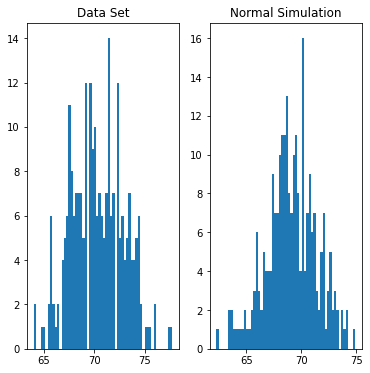

In [15]:
# Plotting both sets of data next to eachother as a histogram. 
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(height, bins = 60)
ax1.set_title("Data Set")

ax2.hist(normal, bins=60)
ax2.set_title("Normal Simulation",   fontsize=12)


#### Summary data

In [16]:
# Running summary data for realworld dataset. 
height_sum = height.describe()

In [17]:
# Storing the random stimulated data in a dataframe and labelling. 
normal_df = pd.DataFrame(normal)
normal_df.columns =['Normal Dist - Simulation']

In [18]:
# Running summary data for the stimulated data. 
normal_sum= normal_df.describe()

In [19]:
height_sum.join(normal_sum)

,Height,Normal Dist - Simulation
count,251.000000,251.000000
mean,70.310757,69.090219
std,2.614296,2.270977
min,64.000000,62.288331
25%,68.250000,67.773914
50%,70.000000,69.027249
75%,72.250000,70.575382
max,77.750000,74.852066


We can see that the normal distribution simulation data provided by numpy random is very similar to the real world dataset published by K. Penrose, A. Nelson, A.G. Fisher. 

## Poisson

Event occuring in a period of time. Output will be a simulation of the number of events that will occur another time thereafter.  Size is optional, we may chose to run its any amount of times. [15][16]

For instances, the event might be the number of car accidents a person is in during their lifetime.  We may run this for the population of a town. 

Average of 4 per person. Town population is 45,000

In [37]:
accident = rng.poisson(4,45000) 

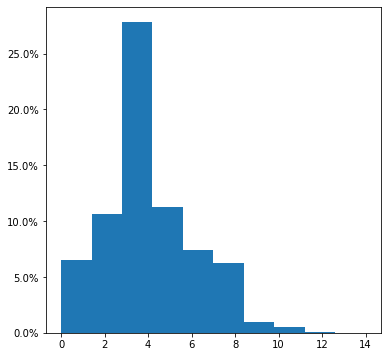

In [38]:
fig, ax1 = plt.subplots()
ax1.hist(accident, density = True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))

##### Percentage of accidents per person

In [40]:
# Converting accidents array to dataframe
df = pd.DataFrame(accident)
df.columns = ["data"]

In [49]:
# Getting frequency of number of accidents per person in percentage. [14]
per = (df['data'].value_counts()/df['data'].count())*100
per.round(1)

4     19.6
3     19.4
5     15.7
2     14.8
6     10.4
1      7.2
7      5.9
8      2.9
0      1.9
9      1.4
10     0.5
11     0.2
12     0.1
13     0.0
14     0.0
Name: data, dtype: float64

In [63]:
a = rng.exponential(8,10000)

(array([5.930e+03, 2.370e+03, 1.013e+03, 3.950e+02, 1.910e+02, 5.400e+01,
        3.000e+01, 1.100e+01, 3.000e+00, 3.000e+00]),
 array([9.40187826e-04, 7.16335918e+00, 1.43257782e+01, 2.14881972e+01,
        2.86506162e+01, 3.58130352e+01, 4.29754542e+01, 5.01378731e+01,
        5.73002921e+01, 6.44627111e+01, 7.16251301e+01]),
 <BarContainer object of 10 artists>)

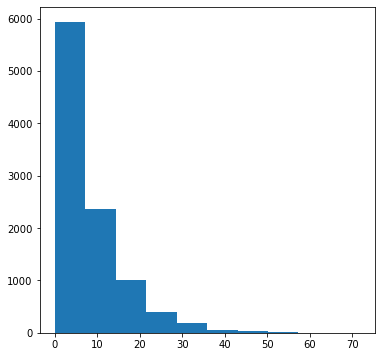

In [64]:
plt.hist(a)

<br>

## Uniform

# References 
- [1]  https://numpy.org/doc/stable/user/whatisnumpy.html
- [2]  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers
- [3]  https://newbedev.com/np-random-choice-probabilities-do-not-sum-to-1
- [4]  https://stackoverflow.com/questions/3679694/a-weighted-version-of-random-choice
- [5]  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
- [6]  https://www.sharpsightlabs.com/blog/numpy-random-choice/#numpy-random-choice-syntax
- [7]  https://numpy.org/doc/stable/user/basics.creation.html
- [8]  https://realpython.com/iterate-through-dictionary-python/#iterating-through-values
- [9]  https://newbedev.com/shuffle-vs-permute-numpy
- [10] https://www.nber.org/system/files/working_papers/h0108/h0108.pdf
- [11] https://www.healthline.com/health/average-height-for-men#_noHeaderPrefixedContent
- [12] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- [13] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal
- [14] https://stackoverflow.com/questions/50558458/pandas-get-frequency-of-item-occurrences-in-a-column-as-percentage
- [15] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson
- [16] https://www.investopedia.com/terms/p/poisson-distribution.asp